In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [3]:
df = pd.read_csv("online_shoppers_intention[2].csv")

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [9]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [11]:
df['Revenue'].value_counts(normalize=True)

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

In [13]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


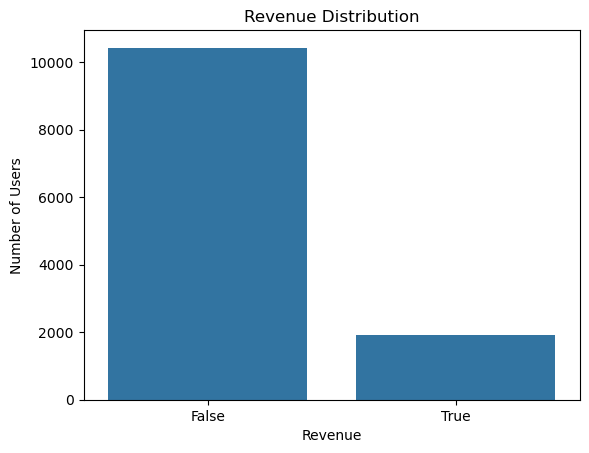

In [15]:
sns.countplot(x='Revenue', data=df)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Number of Users')
plt.show()

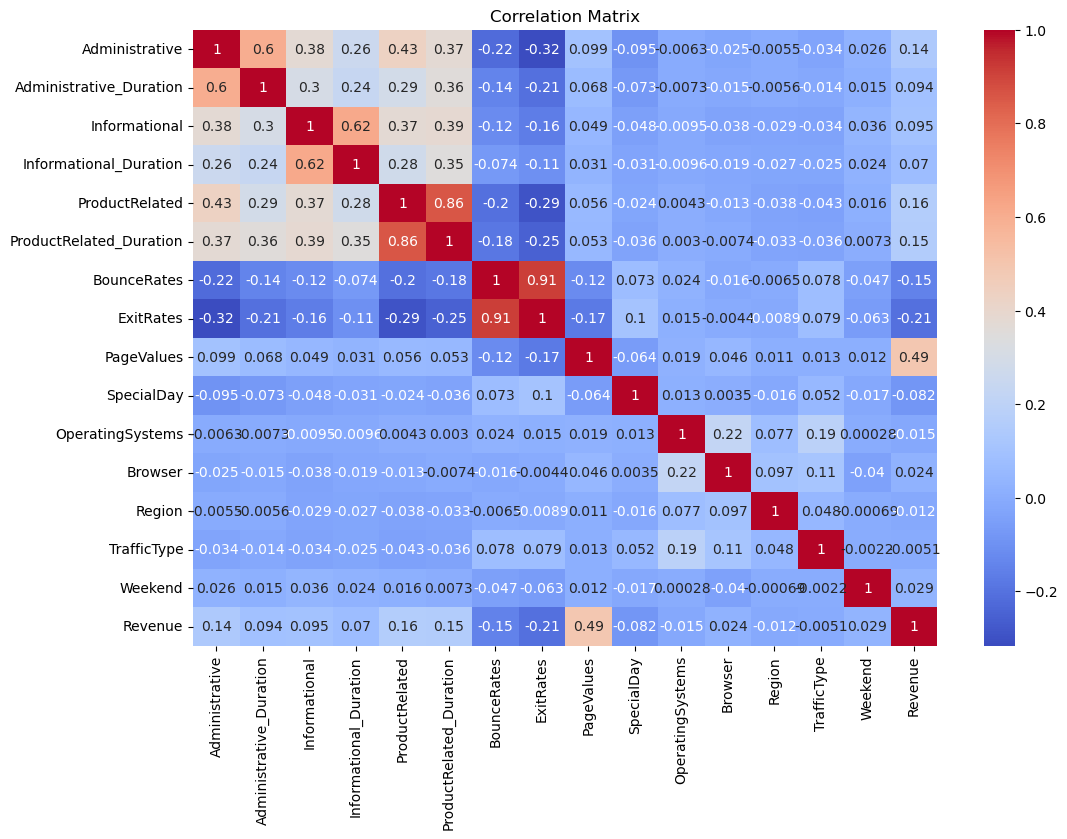

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
df_encoded = pd.get_dummies(df, columns=['Month', 'VisitorType'], drop_first=True)

In [21]:
X = df_encoded.drop('Revenue', axis=1)
y = df_encoded['Revenue']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [25]:
print(df_encoded.shape)

(12330, 27)


In [27]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8631, 26)
X_test shape: (3699, 26)
y_train shape: (8631,)
y_test shape: (3699,)


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [31]:
y_pred = rf_model.predict(X_test)

In [33]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC Score
y_prob = rf_model.predict_proba(X_test)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy: 0.8999729656663963

Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.97      0.94      3127
        True       0.75      0.53      0.62       572

    accuracy                           0.90      3699
   macro avg       0.83      0.75      0.78      3699
weighted avg       0.89      0.90      0.89      3699


Confusion Matrix:
 [[3026  101]
 [ 269  303]]
ROC-AUC Score: 0.916770469696597


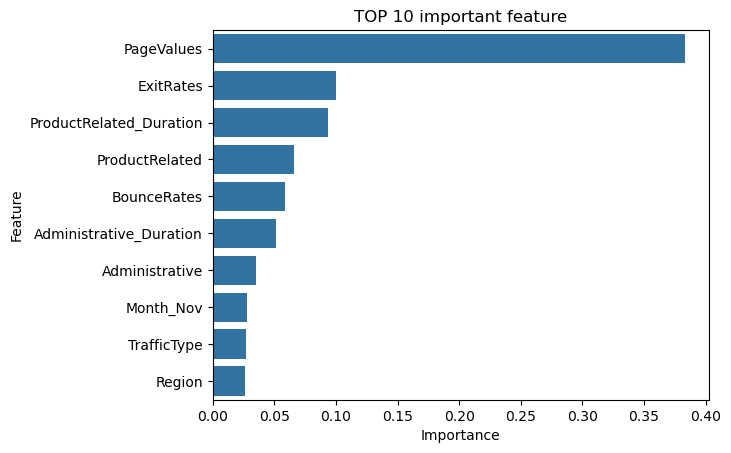

In [35]:
importances = rf_model.feature_importances_
features = X_train.columns

feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Visualize TOP 10 feaute
sns.barplot(data=feature_df.head(10), x='Importance', y='Feature')
plt.title('TOP 10 important feature')
plt.show()

In [37]:
segment_returning = df_encoded[df_encoded['VisitorType_Returning_Visitor'] == 1]

segment_new = df_encoded[df_encoded['VisitorType_Returning_Visitor'] == 0]

In [39]:
# Returning Visitors
X_ret = segment_returning.drop('Revenue', axis=1)
y_ret = segment_returning['Revenue']

# New / Other Visitors
X_new = segment_new.drop('Revenue', axis=1)
y_new = segment_new['Revenue']

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# For Returning Visitor Segment
X_train_ret, X_test_ret, y_train_ret, y_test_ret = train_test_split(
    X_ret, y_ret, test_size=0.3, random_state=42, stratify=y_ret)

rf_ret = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_ret.fit(X_train_ret, y_train_ret)
y_pred_ret = rf_ret.predict(X_test_ret)

print("=== Returning Visitors ===")
print("Accuracy:", accuracy_score(y_test_ret, y_pred_ret))
print(classification_report(y_test_ret, y_pred_ret))

=== Returning Visitors ===
Accuracy: 0.8960833859759949
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      2725
        True       0.70      0.45      0.55       441

    accuracy                           0.90      3166
   macro avg       0.81      0.71      0.74      3166
weighted avg       0.89      0.90      0.89      3166



In [43]:
# For New Visitor Segment
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.3, random_state=42, stratify=y_new)

rf_new = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_new.fit(X_train_new, y_train_new)
y_pred_new = rf_new.predict(X_test_new)

print("=== New/Other Visitors ===")
print("Accuracy:", accuracy_score(y_test_new, y_pred_new))
print(classification_report(y_test_new, y_pred_new))

=== New/Other Visitors ===
Accuracy: 0.9232209737827716
              precision    recall  f1-score   support

       False       0.93      0.97      0.95       403
        True       0.90      0.77      0.83       131

    accuracy                           0.92       534
   macro avg       0.92      0.87      0.89       534
weighted avg       0.92      0.92      0.92       534



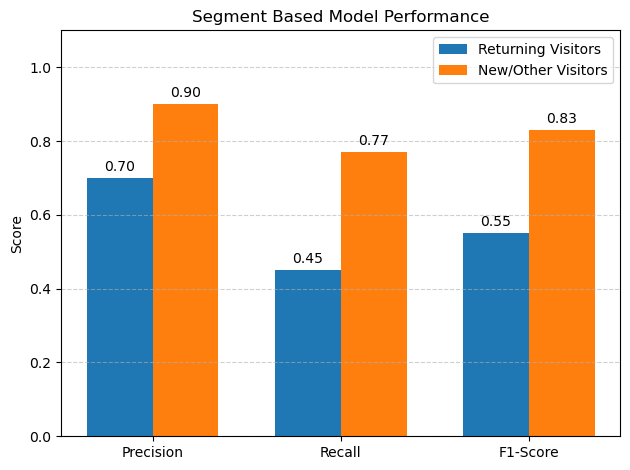

In [45]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Precision', 'Recall', 'F1-Score']
returning = [0.70, 0.45, 0.55]
new_visitors = [0.90, 0.77, 0.83]

x = np.arange(len(metrics)) 
width = 0.35  

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, returning, width, label='Returning Visitors', color='#1f77b4')
bars2 = ax.bar(x + width/2, new_visitors, width, label='New/Other Visitors', color='#ff7f0e')

ax.set_ylabel('Score')
ax.set_title('Segment Based Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 px yukarı
                textcoords="offset points",
                ha='center', va='bottom')

plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [47]:
from imblearn.over_sampling import SMOTE

In [49]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Post-SMOTE data format:", X_train_smote.shape)
print("True rate:", y_train_smote.value_counts(normalize=True))

Post-SMOTE data format: (14590, 26)
True rate: Revenue
False    0.5
True     0.5
Name: proportion, dtype: float64


In [51]:
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = rf_smote.predict(X_test)
y_prob_smote = rf_smote.predict_proba(X_test)[:,1]

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_smote))

Accuracy: 0.8853744255204109

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.92      0.93      3127
        True       0.61      0.70      0.66       572

    accuracy                           0.89      3699
   macro avg       0.78      0.81      0.79      3699
weighted avg       0.89      0.89      0.89      3699


Confusion Matrix:
 [[2872  255]
 [ 169  403]]
ROC-AUC Score: 0.915083437509085


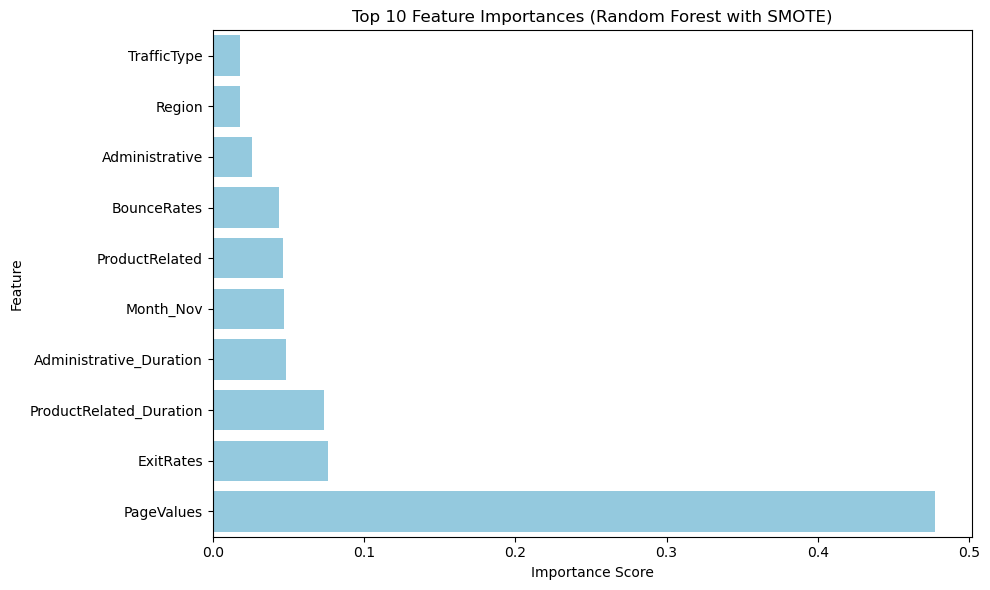

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

importances = rf_smote.feature_importances_
features = X.columns

feat_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=True).tail(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, color='skyblue')  # use 'color' instead of 'palette'
plt.title('Top 10 Feature Importances (Random Forest with SMOTE)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [57]:
from sklearn.linear_model import LogisticRegression

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

In [61]:
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_train_smote_scaled, y_train_smote)

# Prediction
y_pred_lr = lr_model.predict(X_test_scaled)
y_prob_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

In [63]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr))

Accuracy: 0.8745606920789403

Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.93      0.93      3127
        True       0.59      0.59      0.59       572

    accuracy                           0.87      3699
   macro avg       0.76      0.76      0.76      3699
weighted avg       0.87      0.87      0.87      3699


Confusion Matrix:
 [[2895  232]
 [ 232  340]]
ROC-AUC Score: 0.8659392254691264


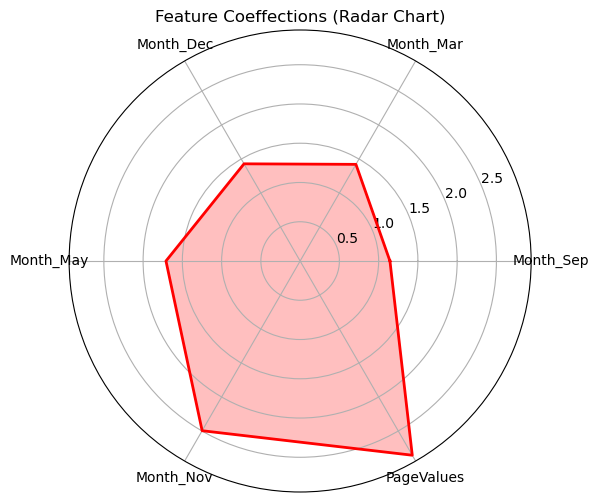

In [65]:
import numpy as np

coefs = lr_model.coef_[0]
features = X.columns

top_idx = np.argsort(np.abs(coefs))[-6:]
top_features = features[top_idx]
top_values = coefs[top_idx]

# Structure for Radar Chart
angles = np.linspace(0, 2 * np.pi, len(top_features), endpoint=False).tolist()
top_values = np.concatenate((top_values, [top_values[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, top_values, color='r', linewidth=2)
ax.fill(angles, top_values, color='r', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(top_features)
ax.set_title('Feature Coeffections (Radar Chart)')
plt.show()

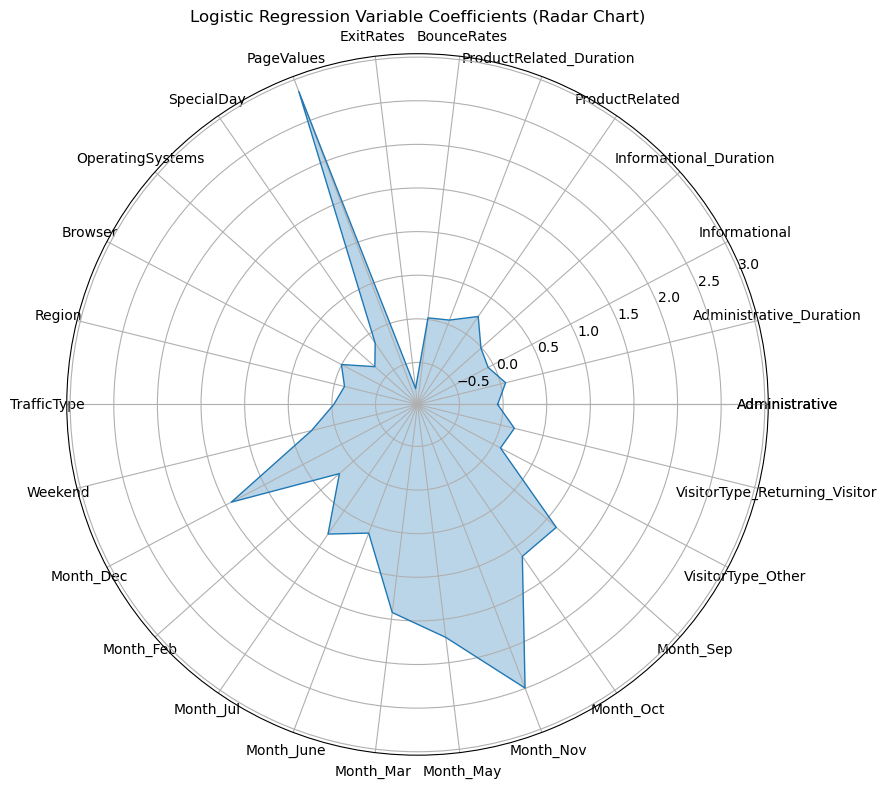

In [67]:
import numpy as np
import matplotlib.pyplot as plt

coefs = lr_model.coef_[0]
features = X_train.columns

angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
coefs = np.concatenate((coefs, [coefs[0]]))
angles += [angles[0]]
features = list(features) + [features[0]] 

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
ax.plot(angles, coefs, linewidth=1, linestyle='solid')
ax.fill(angles, coefs, alpha=0.3)
ax.set_thetagrids(np.degrees(angles), features)
plt.title("Logistic Regression Variable Coefficients (Radar Chart)")
plt.tight_layout()
plt.show()

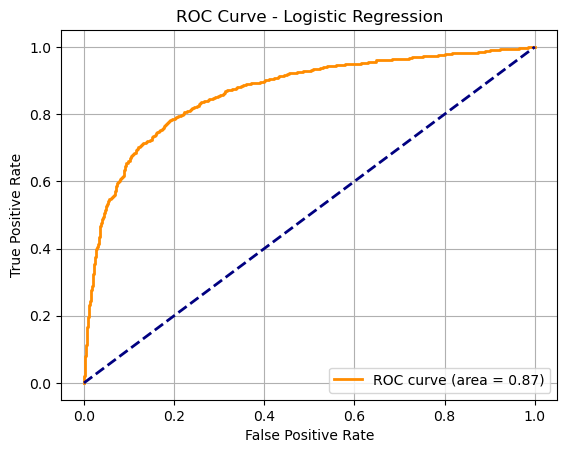

In [69]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid()
plt.show()

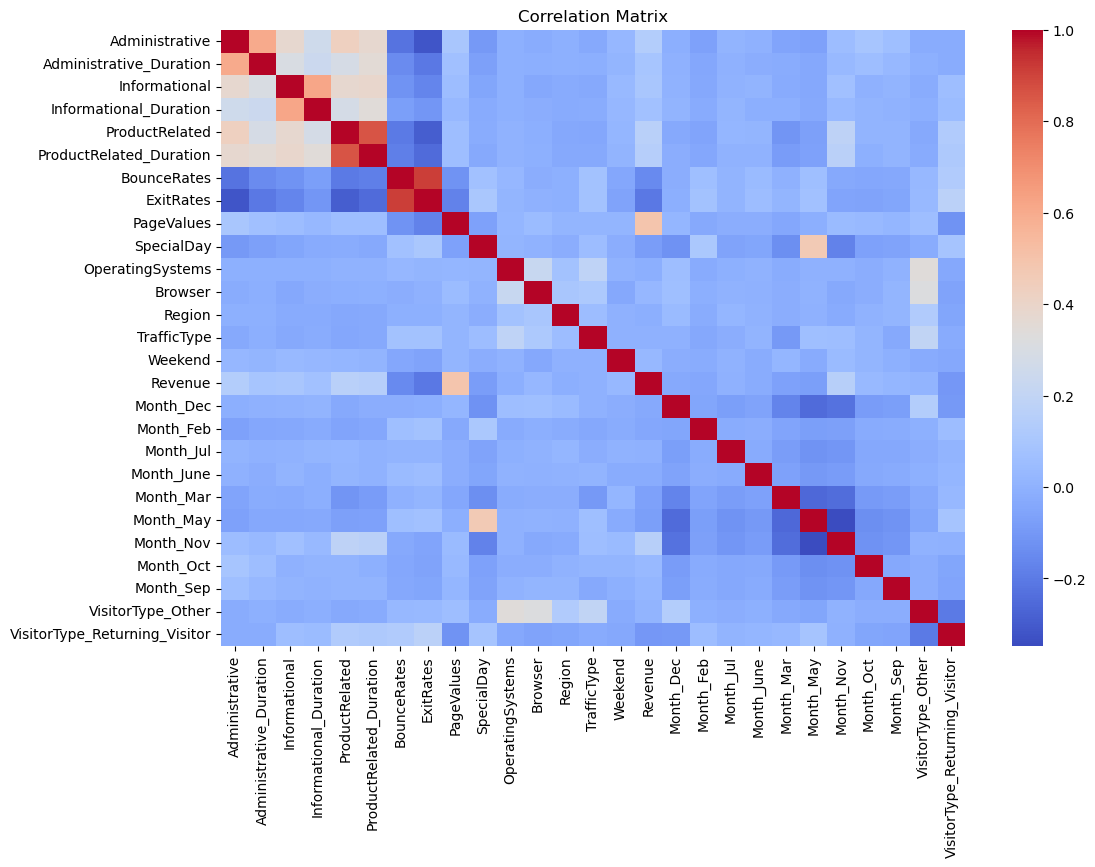

In [71]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()

In [73]:
import xgboost as xgb
from xgboost import XGBClassifier

In [77]:
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [79]:
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb))

Accuracy: 0.8894295755609625

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.93      0.93      3127
        True       0.63      0.67      0.65       572

    accuracy                           0.89      3699
   macro avg       0.79      0.80      0.79      3699
weighted avg       0.89      0.89      0.89      3699


Confusion Matrix:
 [[2904  223]
 [ 186  386]]
ROC-AUC Score: 0.9180261695451974


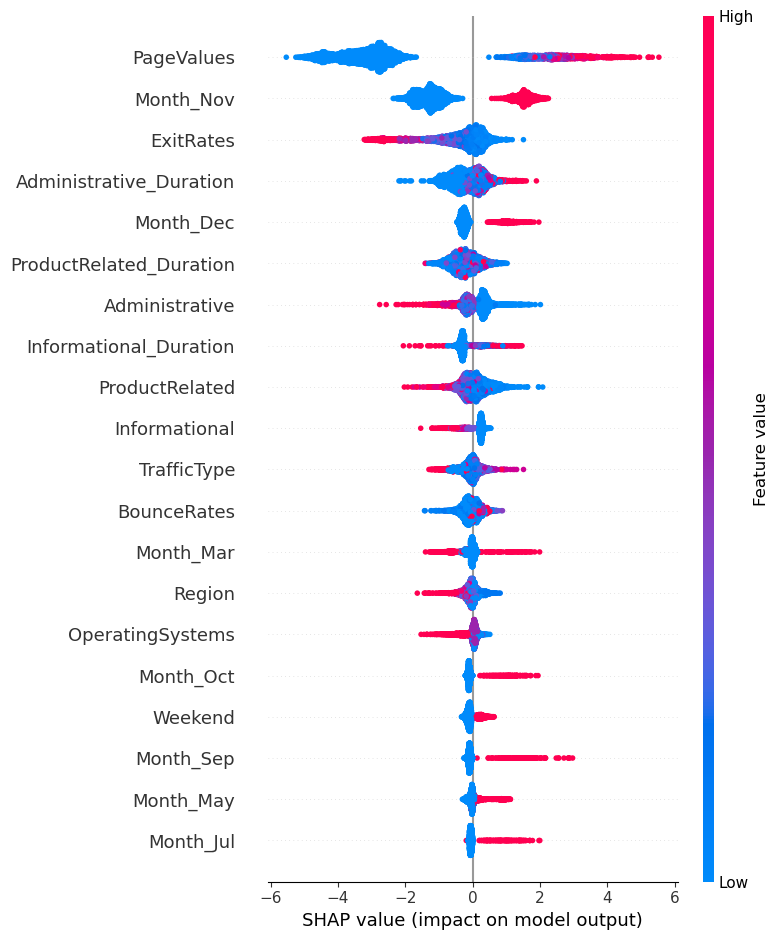

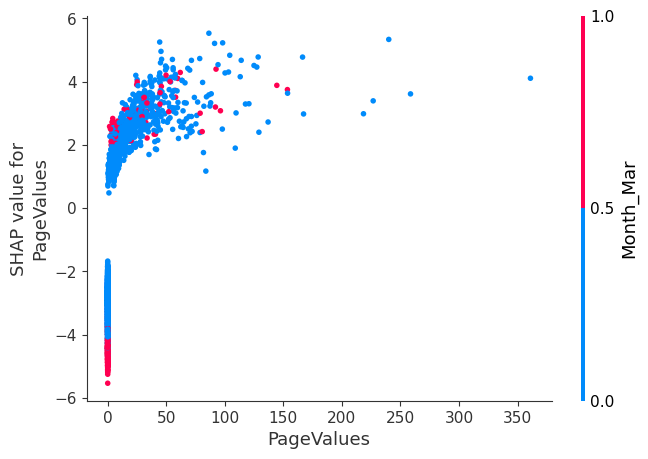

In [83]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns

# SHAP explainer
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)

# Summary plot to find top feature
shap.summary_plot(shap_values_xgb, X_test)

# Dependence plot for top feature
top_feature = X_test.columns[np.abs(shap_values_xgb).mean(0).argmax()]
shap.dependence_plot(top_feature, shap_values_xgb, X_test)

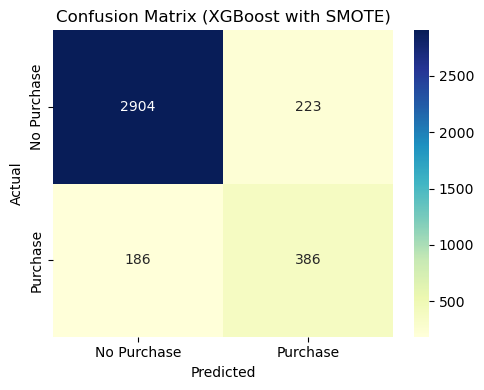

In [85]:
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=['No Purchase', 'Purchase'], 
            yticklabels=['No Purchase', 'Purchase'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost with SMOTE)')
plt.tight_layout()
plt.show()

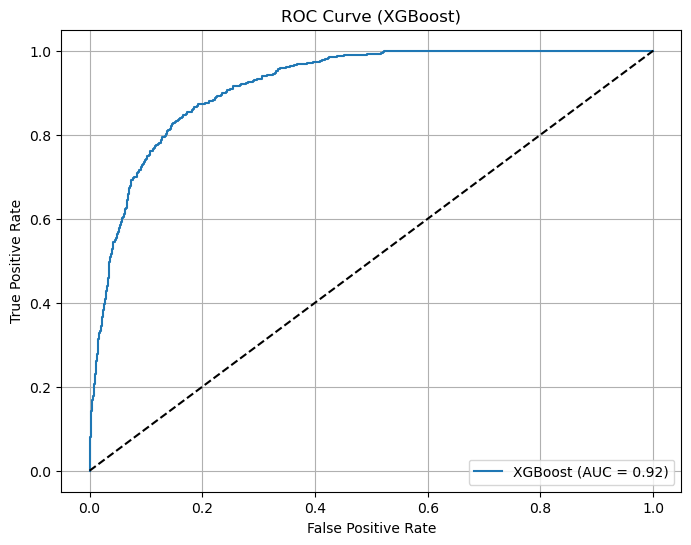

In [87]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = xgb_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (XGBoost)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [89]:
import shap
import matplotlib.pyplot as plt

In [91]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_test)

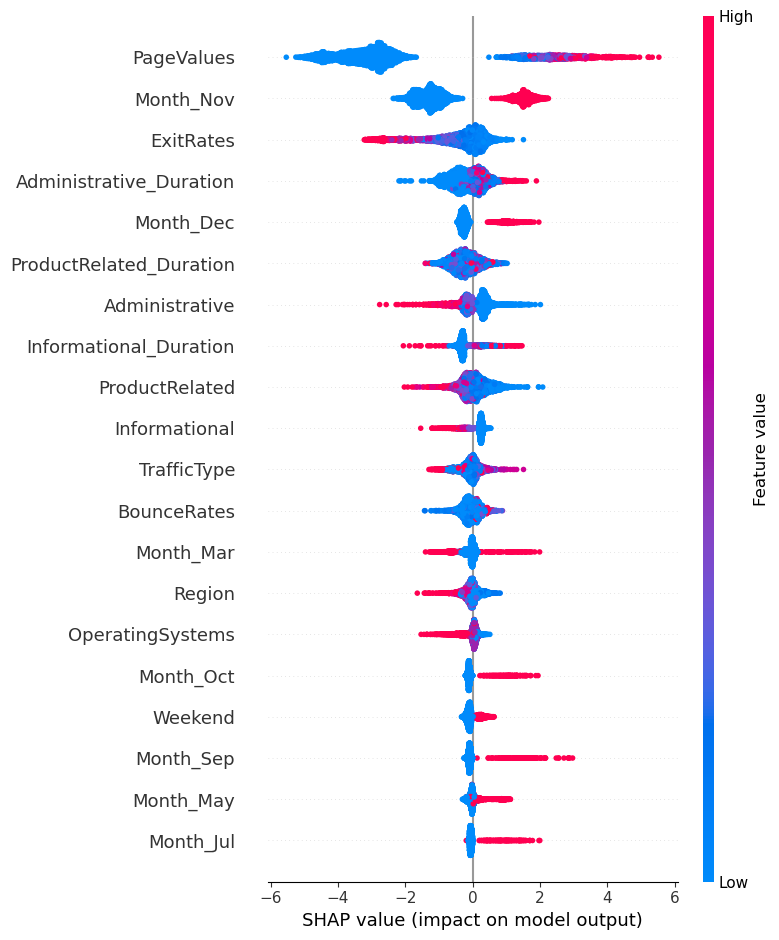

In [93]:
shap.summary_plot(shap_values, X_test)

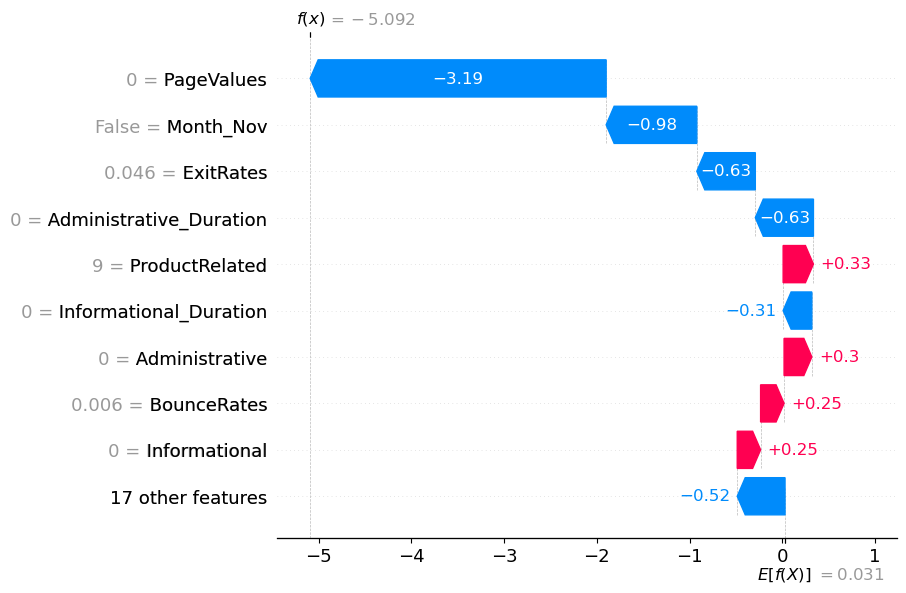

In [95]:
shap.plots.waterfall(shap_values[0])

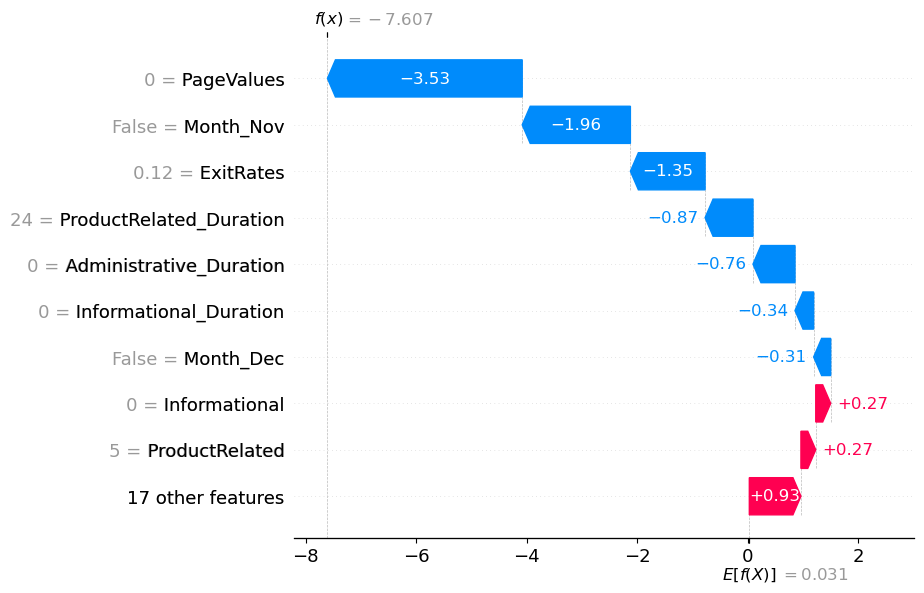

In [97]:
shap.plots.waterfall(shap_values[1])

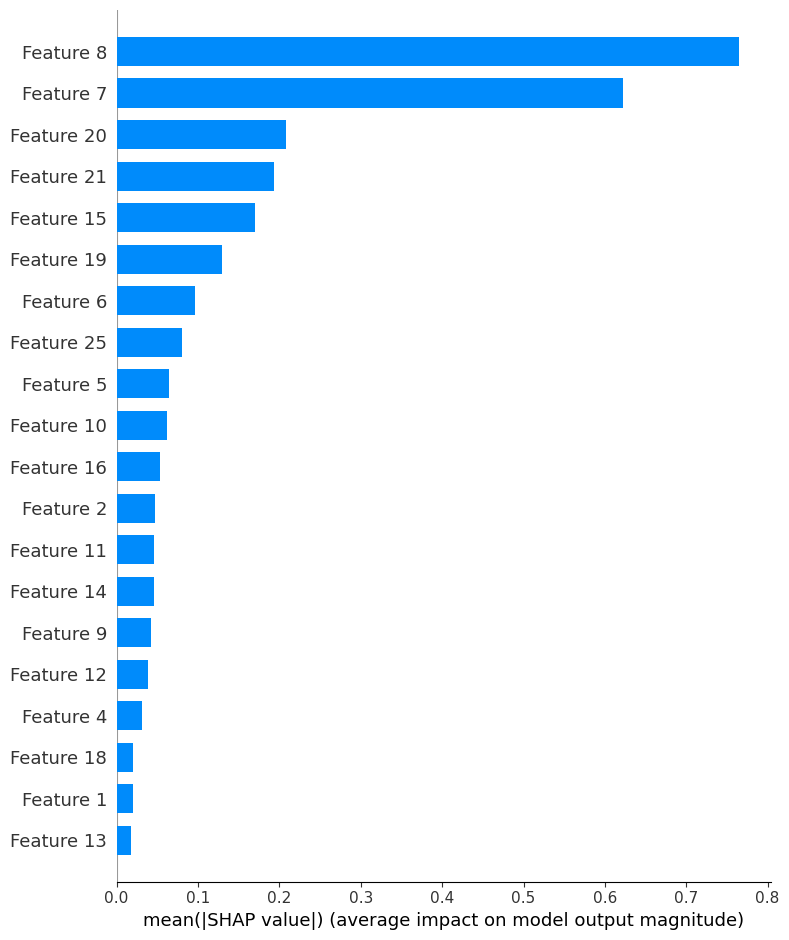

In [101]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LogisticRegression(max_iter=2000, solver='lbfgs')
lr_model.fit(X_train_scaled, y_train)

explainer = shap.Explainer(lr_model, masker=shap.maskers.Independent(X_train_scaled))

shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, plot_type="bar")

In [103]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
clustering_df = df_encoded.drop(columns=['Revenue'])

In [107]:
scaler = StandardScaler()
clustering_scaled = scaler.fit_transform(clustering_df)

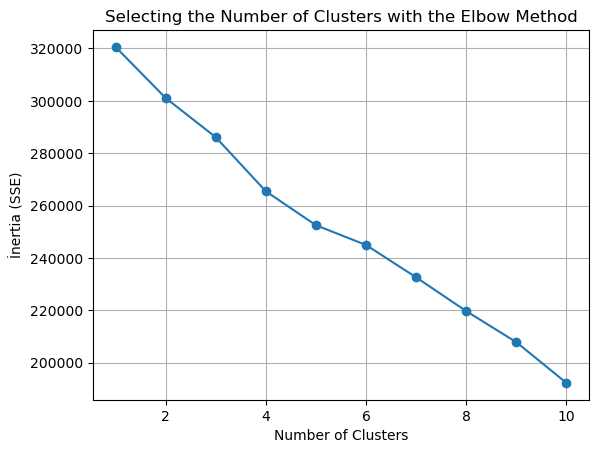

In [109]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_scaled)
    sse.append(kmeans.inertia_)

plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('İnertia (SSE)')
plt.title('Selecting the Number of Clusters with the Elbow Method')
plt.grid()
plt.show()

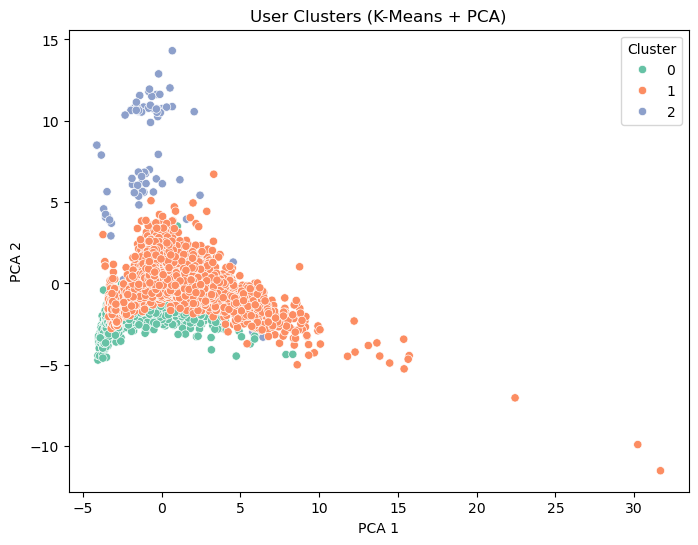

In [111]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_scaled)

df_encoded['Cluster'] = clusters

pca = PCA(n_components=2)
components = pca.fit_transform(clustering_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=components[:,0], y=components[:,1], hue=clusters, palette='Set2')
plt.title('User Clusters (K-Means + PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()